In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Data Analysis:
- isna(), info(), decribe(), crosstab()
- plots
- correlation matrix 
- sort data by date

In [52]:
# Load the data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
# No missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [55]:
# value counts for the categorical columns
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [56]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [57]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [58]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

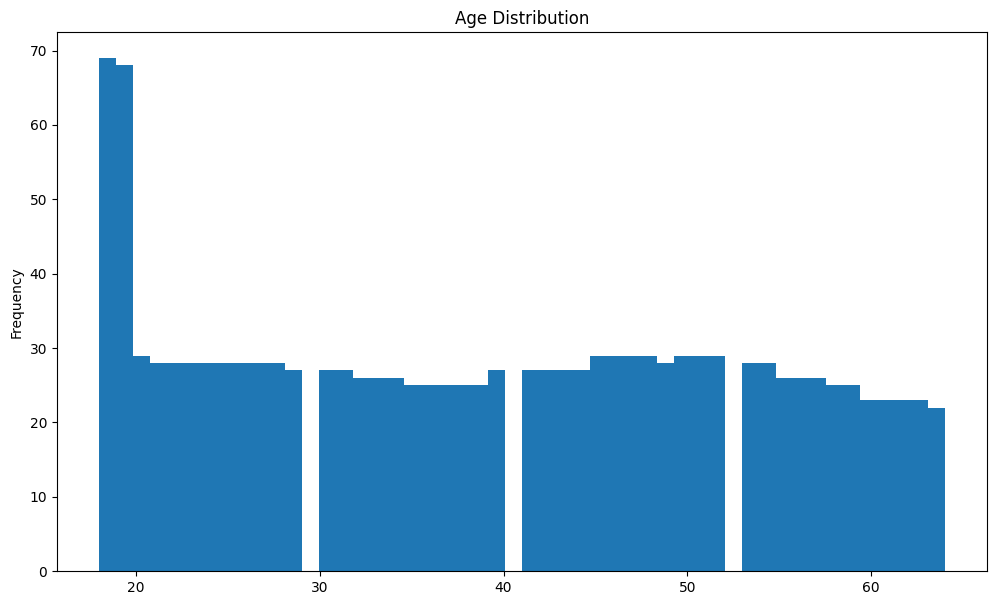

In [59]:
# Age Distribution
plt.figure(figsize=(12, 7))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
df['age'].plot(kind='hist', bins=50)


<Axes: title={'center': 'BMI Distribution'}, ylabel='Frequency'>

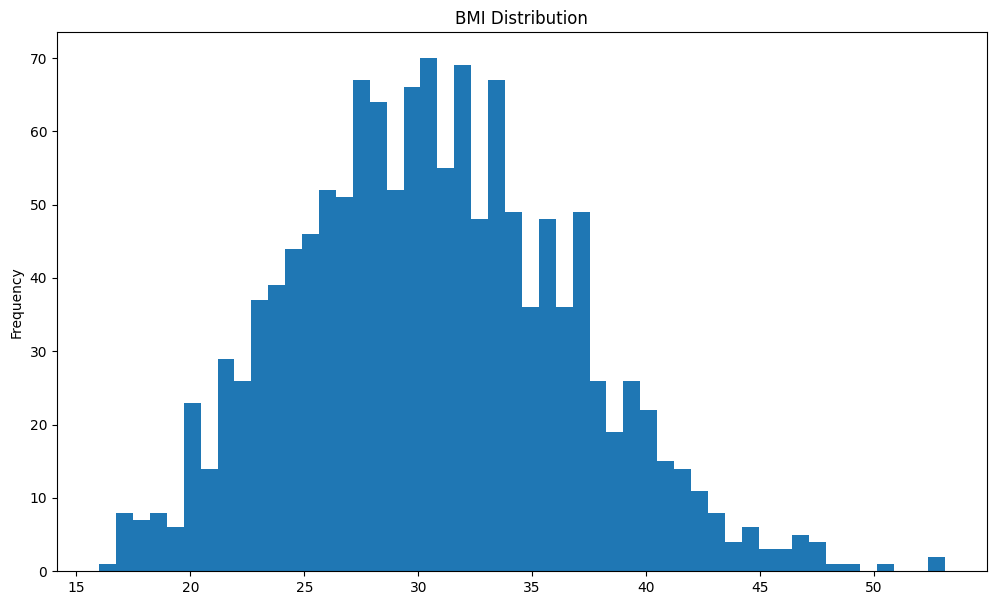

In [60]:
# BMI Distribution
plt.figure(figsize=(12, 7))
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
df['bmi'].plot(kind='hist', bins=50)


<Axes: title={'center': 'Children Distribution'}, ylabel='Frequency'>

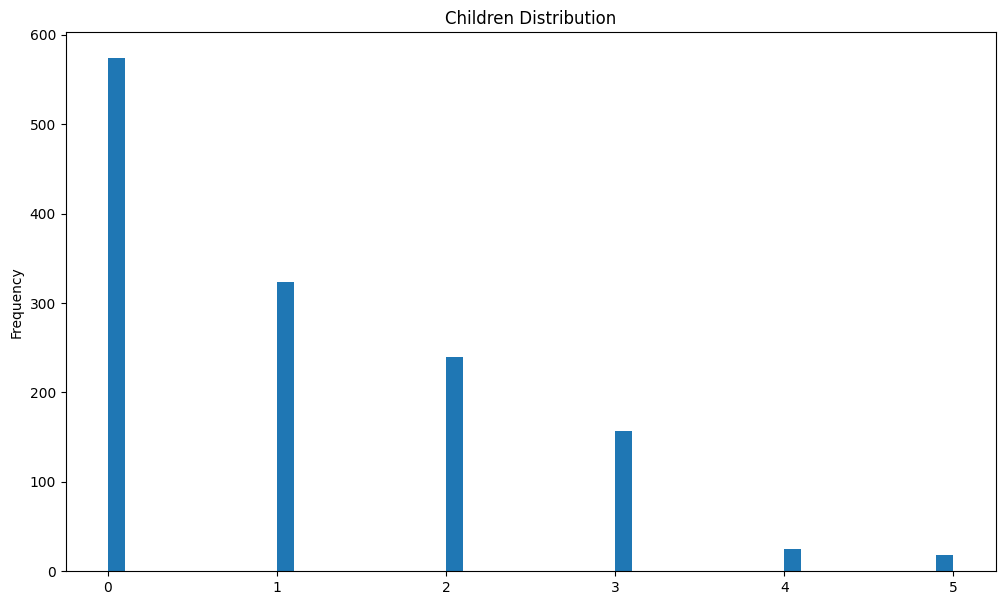

In [61]:
# children Distribution
plt.figure(figsize=(12, 7))
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
df['children'].plot(kind='hist', bins=50)

<Axes: title={'center': 'Expenses Distribution'}, ylabel='Frequency'>

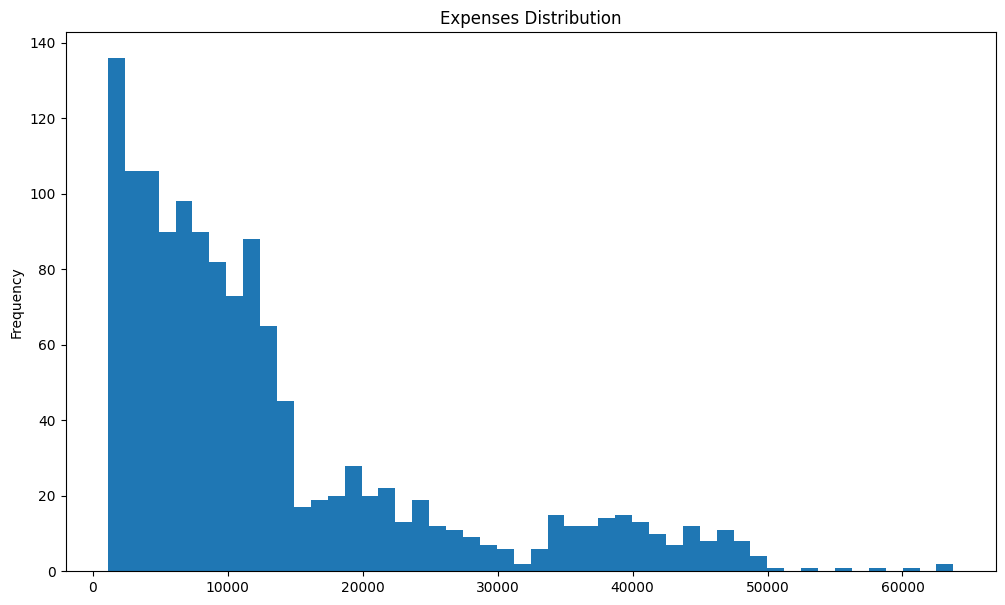

In [62]:
# expenses Distribution
plt.figure(figsize=(12, 7))
plt.title('Expenses Distribution')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
df['expenses'].plot(kind='hist', bins=50)

# 2. Convert Categorical Features into Numericals 
- One hot encoder: Lasso or Ridge
- Label encoding: XGBoost and RandomForest
- Lower cardinality columns: One hot encoding
- High cardinality columns: Target encoding, Ordinal encoding
- Convert to category
- https://www.kaggle.com/code/gokuleshwaran/feature-engineering-for-house-prices/edit

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [64]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_23132\738676196.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_23132\738676196.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})
C:\Users\Gokuleshwaran\AppData\Local\Temp\ipykernel_23132\738676196.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


# 3. Split the data into x and y label

In [66]:
x = df.drop('expenses', axis=1)
y = df['expenses']

# normalize the data
x = (x - x.mean()) / x.std()

# 4. Split the data into x_train, x_test, y_train, y_test

In [67]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [68]:
x_train.shape, x_test.shape

((1070, 6), (268, 6))

# 5. Evaluation
- show_scores(model, x_train, x_test, y_train, y_test)
- score_dataset()
- y_preds = model.predict()
- y_probs = model.predict_proba()

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def show_scores(model, x_train, x_test, y_train, y_test):
  # Calculate the model's predictions
  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  # Evaluate the model's performance using various metrics
  mae_train = mean_absolute_error(y_train, train_preds)
  mae_test = mean_absolute_error(y_test, test_preds)
  mse_train = mean_squared_error(y_train, train_preds)
  mse_test = mean_squared_error(y_test, test_preds)
  r2_train = r2_score(y_train, train_preds)
  r2_test = r2_score(y_test, test_preds)

  # Print the results
  print("Model:", model.__class__.__name__)
  print("-" * 30)
  print("Training set:")
  print("- RMSE:", np.sqrt(mse_train))
  print("- MAE:", mae_train)
  print("- R2 Score:", r2_train)
  print("-" * 30)
  print("Test set:")
  print("- RMSE:", np.sqrt(mse_test))
  print("- MAE:", mae_test)
  print("- R2 Score:", r2_test)

# 6. Fit the train data into models
- compare the aaccuracy or other metrics.

In [70]:
# Linear Regression
lr = LinearRegression()

In [71]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [72]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

In [73]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, random_state=0)

In [74]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0, random_state=0)

In [75]:
# Support Vector Regressor
from sklearn.svm import SVR
svr = SVR()

In [76]:
models = [lr, rf, dt, lasso, ridge, svr]
model_names = [model.__class__.__name__ for model in models]
for model in models:
  model.fit(x_train, y_train)
  show_scores(model, x_train, x_test, y_train, y_test)
  print("\n")

Model: LinearRegression
------------------------------
Training set:
- RMSE: 6142.3262185601
- MAE: 4235.110544644296
- R2 Score: 0.7368404516664875
------------------------------
Test set:
- RMSE: 5642.787953533292
- MAE: 3930.2173746197855
- R2 Score: 0.7999053396503137




Model: RandomForestRegressor
------------------------------
Training set:
- RMSE: 1952.7651881930205
- MAE: 1066.8518413894083
- R2 Score: 0.9734017278790907
------------------------------
Test set:
- RMSE: 4546.785095707369
- MAE: 2734.111981169154
- R2 Score: 0.8700857191008615


Model: DecisionTreeRegressor
------------------------------
Training set:
- RMSE: 494.2061177475097
- MAE: 29.57252336448598
- R2 Score: 0.9982963922362096
------------------------------
Test set:
- RMSE: 7465.846463896241
- MAE: 3671.6909328358215
- R2 Score: 0.6497274153269816


Model: Lasso
------------------------------
Training set:
- RMSE: 6142.326724884666
- MAE: 4235.006081364933
- R2 Score: 0.7368404082809215
------------------------------
Test set:
- RMSE: 5643.084798231413
- MAE: 3930.363487172224
- R2 Score: 0.799884286723336


Model: Ridge
------------------------------
Training set:
- RMSE: 6142.334046412147
- MAE: 4236.110094585689
- R2 Score: 0.7368397809188754
------------------------------


In [77]:
# best model is Random Forest Regressor
# let's tune the hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
# best parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Gokuleshwaran\Desktop\25-Projects\10. Medical Insurance Cost Prediction\.venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [78]:
show_scores(rf_random, x_train, x_test, y_train, y_test)

Model: RandomizedSearchCV
------------------------------
Training set:
- RMSE: 4280.770546273372
- MAE: 2357.057080185417
- R2 Score: 0.8721804524725714
------------------------------
Test set:
- RMSE: 3928.5269136563343
- MAE: 2369.0492488358095
- R2 Score: 0.9030143448479301


In [79]:
# Save the model
import joblib
joblib.dump(rf_random, 'insurance_model')

['insurance_model']

In [80]:
x_test.head()

,age,sex,bmi,children,smoker,region
578,0.910535,-0.989221,-0.076327,-0.078738,-0.507273,-1.343402
610,0.554662,1.010141,-0.207509,-0.078738,-0.507273,-0.438331
569,0.625836,-0.989221,1.629043,0.750799,1.969850,0.466741
1034,1.551106,-0.989221,1.268292,-0.908274,-0.507273,0.466741
198,0.839360,1.010141,-2.060460,-0.908274,-0.507273,0.466741


In [81]:
y_test.head()

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
Name: expenses, dtype: float64

In [82]:
x_test.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
